# Introduction to *pyDeltaRCM*

# Running the model in 5 lines of code

The *pyDeltaRCM* model operations are split into many different "methods" (i.e., functions) that represent a logical step in the model routine. 
We've made an effort to name these methods descriptively, so that the high level functionality of each method is immediately clear, but all of the methods are also individually documented (e.g., [water methods are documented here](https://deltarcm.org/pyDeltaRCM/reference/water_tools/index.html#public-api-methods-attached-to-model)).

---
* `init_domain`
* `init_output_infrastructure`
* `update`
  * `solve_water_and_sediment_timestep`
    * `route_water`
      * `init_water_iteration`
      * `run_water_iteration`
      * `compute_free_surface`
      * `finalize_water_iteration`
    * `route_sediment`  
  * `apply_subsidence`
  * `finalize_timestep`
  * `output_data`
  * `output_checkpoint`
* `finalize`
---



_pyDeltaRCM_ is built with an object-oriented interface. So, in the most basic use case you "run the model" by 1) initializing the model, and 2) updating the model.

Let's start by importing the package, and then creating a `DeltaModel`.

In [2]:
pip install deltametrics

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 111.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 99.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 kB 27.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pyDeltaRCM
from VegetationModel import VegetationModel
import xarray as xr
import deltametrics as dm
from matplotlib.animation import PillowWriter

In [2]:
# seems like you need the yaml file
delta_veg = VegetationModel(
    input_file='./vegetation.yaml',
    out_dir='./vegetation_output',
    save_checkpoint=True,
    save_dt=86400,
    clobber_netcdf=True,
    vegetation=True
    )

Time: 0.0; timestep: 0


/opt/tljh/user/envs/ivy/lib/python3.11/site-packages/pyDeltaRCM/init_tools.py:626: UserWarning: Replacing existing netCDF file
  warnings.warn(UserWarning(_msg))


In [4]:
# turn veg off
delta_noveg = VegetationModel(
    input_file='./vegetation.yaml',
    out_dir='./vegetation_output',
    save_checkpoint=True,
    save_dt=86400,
    clobber_netcdf=True,
    vegetation=False
    )

Time: 0.0; timestep: 0


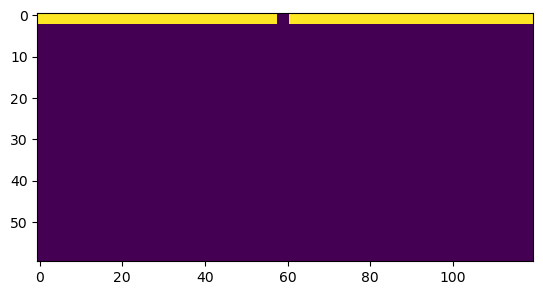

In [5]:
# This is the grid we are about to run the models on--- no bed elevation anywhere yet 
fig,ax=plt.subplots()
ax.imshow(delta_noveg.bed_elevation)
plt.show()

We saw the bed elevation displayed above, but internally this variable is normally referred to as `eta`. Some other important variables names:

* `eta` : bed elevation (m)
* `depth` : flow depth (m)
* `stage` : water surface elevation (m)
* `uw` : along-streamline flow velocity (m/s)
* `qs` : sediment transport volume (m3/s)

Let's see what a few of these look like:

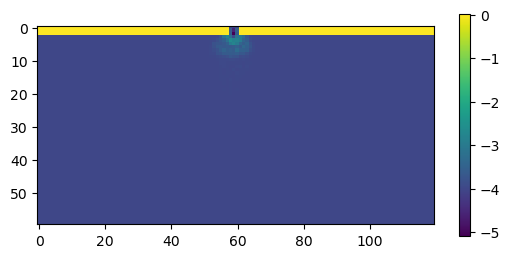

In [10]:
fig, ax = plt.subplots()
im = ax.imshow(delta_noveg.eta)  # change this line to view different variables
plt.colorbar(im, ax=ax, shrink=0.6)
plt.show()

Model parameters can also be defined using a YAML configuration file where the user provides a list of model parameters and their values. For more detailed information on how to write and use YAML files to configure *pyDeltaRCM* model runs, check out [the user guide](https://deltarcm.org/pyDeltaRCM/guides/user_guide.html#configuring-an-input-yaml-file).

In [3]:
# create a smaller delta model (default values in [brackets])
delta_veg = VegetationModel(
    input_file='./vegetation.yaml',
    out_dir='./vegetation_output',
    save_checkpoint=True,
    save_dt=86400,
    clobber_netcdf=True,
    vegetation=True,
    save_veg_frac_figs = True,
    )

Time: 0.0; timestep: 0


In [4]:
from IPython.display import clear_output

for i in range(1000):
    delta_veg.update()
delta_veg.finalize()


Time: 13636.4; timestep: 1
Time: 27272.7; timestep: 2
Time: 40909.1; timestep: 3
Time: 54545.5; timestep: 4
Time: 68181.8; timestep: 5
Time: 81818.2; timestep: 6
Time: 95454.5; timestep: 7
Time: 109090.9; timestep: 8
Time: 122727.3; timestep: 9
Time: 136363.6; timestep: 10
Time: 150000.0; timestep: 11
Time: 163636.4; timestep: 12
Time: 177272.7; timestep: 13
Time: 190909.1; timestep: 14
Time: 204545.5; timestep: 15
Time: 218181.8; timestep: 16
Time: 231818.2; timestep: 17
Time: 245454.5; timestep: 18
Time: 259090.9; timestep: 19
Time: 272727.3; timestep: 20
Time: 286363.6; timestep: 21
Time: 300000.0; timestep: 22
Time: 313636.4; timestep: 23
Time: 327272.7; timestep: 24
Time: 340909.1; timestep: 25
Time: 354545.5; timestep: 26
Time: 368181.8; timestep: 27
Time: 381818.2; timestep: 28
Time: 395454.5; timestep: 29
Time: 409090.9; timestep: 30
Time: 422727.3; timestep: 31
Time: 436363.6; timestep: 32
Time: 450000.0; timestep: 33
Time: 463636.4; timestep: 34
Time: 477272.7; timestep: 35
T

In [5]:
data = xr.open_dataset('./vegetation_output/pyDeltaRCM_output.nc')
data['eta'].shape # 72 timesteps, 60X120 grid
extent = [
    np.min(data.coords['y']),
    np.max(data.coords['y']),
    np.min(data.coords['x']),
    np.max(data.coords['x'])
]

In [6]:
data['eta']

<xarray.DataArray 'eta' (time: 143, x: 60, y: 120)> Size: 4MB
[1029600 values with dtype=float32]
Coordinates:
  * time     (time) float32 572B 0.0 9.545e+04 1.909e+05 ... 1.346e+07 1.355e+07
  * x        (x) float32 240B 0.0 50.0 100.0 150.0 ... 2.85e+03 2.9e+03 2.95e+03
  * y        (y) float32 480B 0.0 50.0 100.0 150.0 ... 5.85e+03 5.9e+03 5.95e+03
Attributes:
    units:    meters

In [7]:
def update_field(i):
    im.set_data(data['eta'][i, :, :]+0.01)
    vegi = data['veg_frac'][i, :, :]
    veg_alpha = 0.6 * (vegi > 0.01).astype(float)
    vegim.set_data(vegi)
    vegim.set_alpha(veg_alpha)

In [8]:
time_idxs = np.arange(0, data['time'].shape[0]-1)
cmap, norm = dm.plot.cartographic_colormap(H_SL=0.0, h=4.5, n=1.0)

fig, ax = plt.subplots(
    gridspec_kw=dict(left=0.1, right=0.9)
)

im = ax.imshow(
    data['eta'][0, :, :],
    extent=extent,
    cmap=cmap, norm=norm
    )
veg0 = data['veg_frac'][0, :, :]
veg_alpha = (veg0 > 0.01).astype(float)
vegim = ax.imshow(
    veg0,
    extent=extent,
    cmap='Oranges', vmin=0, vmax=0.2,  # hardcoded max for colorbar at veg_frac = 0.2
    alpha=veg_alpha
    )

cb0 = plt.colorbar(im, shrink=0.45, label='elevation [m]')
cb1 = plt.colorbar(vegim, shrink=0.45, label='vegetation frac [-]')

plt.savefig('initial_frame.png', dpi = 300)

anim = animation.FuncAnimation(
    fig, update_field,
    frames=data['eta'].shape[0]-1)
anim.save('simple_veg_movie.gif', fps=20)

plt.close()

/home/jupyter-skarimaghaei@utexa-afc67/.local/lib/python3.11/site-packages/deltametrics/plot.py:566: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  blues = matplotlib.cm.get_cmap('Blues_r', 64)
/home/jupyter-skarimaghaei@utexa-afc67/.local/lib/python3.11/site-packages/deltametrics/plot.py:567: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  greens = matplotlib.cm.get_cmap('YlGn_r', 64)
MovieWriter ffmpeg unavailable; using Pillow instead.


# Some things to ponder

Do environmental conditions (input sediment composition, sea level, vegetation, ice, permafrost) appear to influence the growth and evolution of river deltas?

<br>

Does this reduced-complexity modeling framework seem capable of simulating landscapes that resemble the Wax Lake and Atchafalaya Deltas? What (if anything) does it seem to be missing?